# Microorganisms Classification using KNN, Decision Tree and Random Forest

## Introduction

Microorganisms are part of the essential living organisms on earth. The microorganism is important to its respective purpose from nature symbiotic to medical drug discovery, food and algriculture industries to wastewater treatment industries. There are many types and species of microorganism and each types and species carries unique and signignificant purpose. However, not all microorganism have beneficial uses, some are harmful and pathogenic. Microorganism can be identified and classified based on its size and shape and even color. In this notebook, we will implement Machine Learning Algorithm for Multiclass Classification which are KNN, Decision Tree and Random Forest in order to determine the class of 10 different type of microorganisms based on it size and shape. Later, we will make comparison and discuss between those 3 algorithms used for the model training. The dataset is obtained from kaggle and can be retrieved via this [Link](https://www.kaggle.com/datasets/sayansh001/microbes-dataset?resource=download).

### 1. Data Loading and Preparation

In [1]:
#import necessary modules
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the file dataset
microbes = pd.read_csv(r"D:\\DC Universe\\Ucsc\\Third Year\\SCS 3201 Machine Learning\\CCPP\\Csv Files\\microbes.csv")
print(microbes.head())

   Unnamed: 0  Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  \
0           0     10.70          15.8           5.43     3.75       0.785   
1           1      5.60          18.3           4.14     6.16       0.364   
2           2      8.32          19.8           4.63     6.66       0.415   
3           3     10.10          17.9           7.29    11.10       1.470   
4           4      6.27          20.2          20.10    10.70      14.700   

   Extent  Orientation  EulerNumber  BoundingBox1  ...  ConvexHull4  \
0    8.14         2.15         22.3          2.97  ...         2.97   
1    3.51        18.60         22.5          5.41  ...         5.47   
2    5.85        21.00         22.4          5.96  ...         5.96   
3    6.30         9.94         21.9          8.81  ...         8.88   
4    3.97         2.58         11.9         10.20  ...        10.20   

   MajorAxisLength  MinorAxisLength  Perimeter  ConvexArea  Centroid1  \
0             1.34             1.61  

In [3]:
print(microbes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30527 non-null  int64  
 1   Solidity         30527 non-null  float64
 2   Eccentricity     30527 non-null  float64
 3   EquivDiameter    30527 non-null  float64
 4   Extrema          30527 non-null  float64
 5   FilledArea       30527 non-null  float64
 6   Extent           30527 non-null  float64
 7   Orientation      30527 non-null  float64
 8   EulerNumber      30527 non-null  float64
 9   BoundingBox1     30527 non-null  float64
 10  BoundingBox2     30527 non-null  float64
 11  BoundingBox3     30527 non-null  float64
 12  BoundingBox4     30527 non-null  float64
 13  ConvexHull1      30527 non-null  float64
 14  ConvexHull2      30527 non-null  float64
 15  ConvexHull3      30527 non-null  float64
 16  ConvexHull4      30527 non-null  float64
 17  MajorAxisLen

In [4]:
# Do data cleaning and preprocessing
# remove uncessary column
microbes = microbes.drop(['Unnamed: 0'], axis=1)
print(microbes.head())

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   
3     10.10          17.9           7.29    11.10       1.470    6.30   
4      6.27          20.2          20.10    10.70      14.700    3.97   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97         10.90  ...         2.97   
1        18.60         22.5          5.41         19.20  ...         5.47   
2        21.00         22.4          5.96         10.20  ...         5.96   
3         9.94         21.9          8.81         10.70  ...         8.88   
4         2.58         11.9         10.20          1.22  ...        10.20   

   MajorAxisLength  MinorAxisLength  Perimeter  ConvexArea  Centroid1  \
0             1.34       

In [5]:
# check any null values in the dataframe
print(microbes.isnull().sum())

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64


In [6]:
# copy dataset
microbes_copy = microbes.copy()

It is wise to visualize the data first before perform any model training to gain a better insight from the data. The data itself is information.

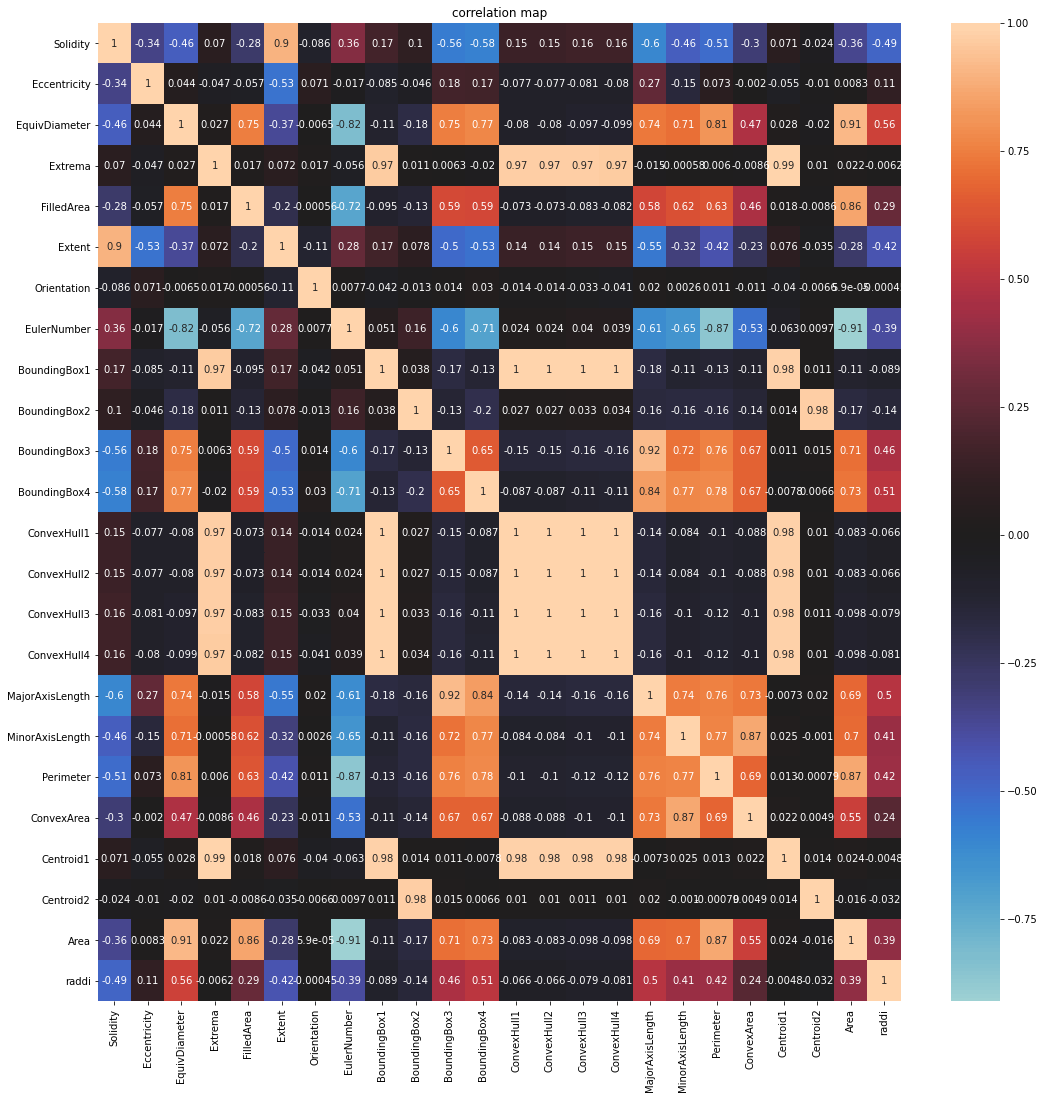

In [7]:
# plot the correlation map for of the Features data
plt.figure(figsize = (18,18))
sns.heatmap(microbes_copy.corr(), center=0, annot=True)
plt.title('correlation map')
plt.show()

Based on the correlation map above, there are clearly some of the features highly correlated to each other and some are insignificantly not correlated to each other. Nevertherless, we will use all the features for the model training.

In [8]:
# Use label encoder from sklearn to change microorganism classification into numerical encoding
le = LabelEncoder()
microbes['Target'] = le.fit_transform(microbes['microorganisms'])
# show the dataframe head
print(microbes.head())

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   
3     10.10          17.9           7.29    11.10       1.470    6.30   
4      6.27          20.2          20.10    10.70      14.700    3.97   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  MajorAxisLength  \
0         2.15         22.3          2.97         10.90  ...             1.34   
1        18.60         22.5          5.41         19.20  ...             1.52   
2        21.00         22.4          5.96         10.20  ...             1.63   
3         9.94         21.9          8.81         10.70  ...             2.04   
4         2.58         11.9         10.20          1.22  ...             7.78   

   MinorAxisLength  Perimeter  ConvexArea  Centroid1  Centroid2    Area  \

In [9]:
# check the label encoding with the microorganism
microbes[['microorganisms', 'Target']].value_counts(sort=False)

microorganisms  Target
Aspergillus sp  0         3888
Diatom          1         1818
Penicillum      2         1080
Pithophora      3         1350
Protozoa        4         3888
Raizopus        5         2552
Spirogyra       6          611
Ulothrix        7         7420
Volvox          8         4320
Yeast           9         3600
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='microorganisms', ylabel='count'>

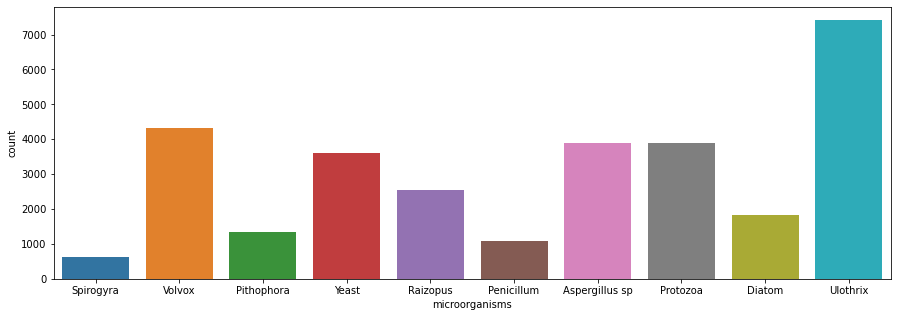

In [10]:
# visualize the Label count
plt.figure(figsize=(15,5))
sns.countplot(microbes['microorganisms'], label="count")

The Label count visualize as above figure. From the figure, there are clearly of data imbalance between the target. This might affect the result of the model training.

In [11]:
# split the data into features and labels
mc_labels = microbes.pop('Target')
mc_features = microbes.copy().drop(columns='microorganisms')

In [12]:
# convert labels and features to numpy array
mc_labels_np = np.array(mc_labels)
mc_features_np = np.array(mc_features)

In [13]:
# Split the data to the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(mc_features_np, mc_labels_np, test_size=0.2, random_state=12345)

In [14]:
print(f"Total X_train size: {X_train.shape}")
print(f"Total X_test size: {X_test.shape}")
print(f"Total y_train size: {y_train.shape}")
print(f"Total y_test size: {y_test.shape}")

Total X_train size: (24421, 24)
Total X_test size: (6106, 24)
Total y_train size: (24421,)
Total y_test size: (6106,)


In [15]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2. Use of KNearest Neighbors (KNN) to determine the type of Microorganism

KNN is type of supervised learning that use for the multiclass classification problem. KNN algorithm works by calculating the "datapoint" distance between its neighbors. The working mechanism of KNN can be illustrated as in figure below.

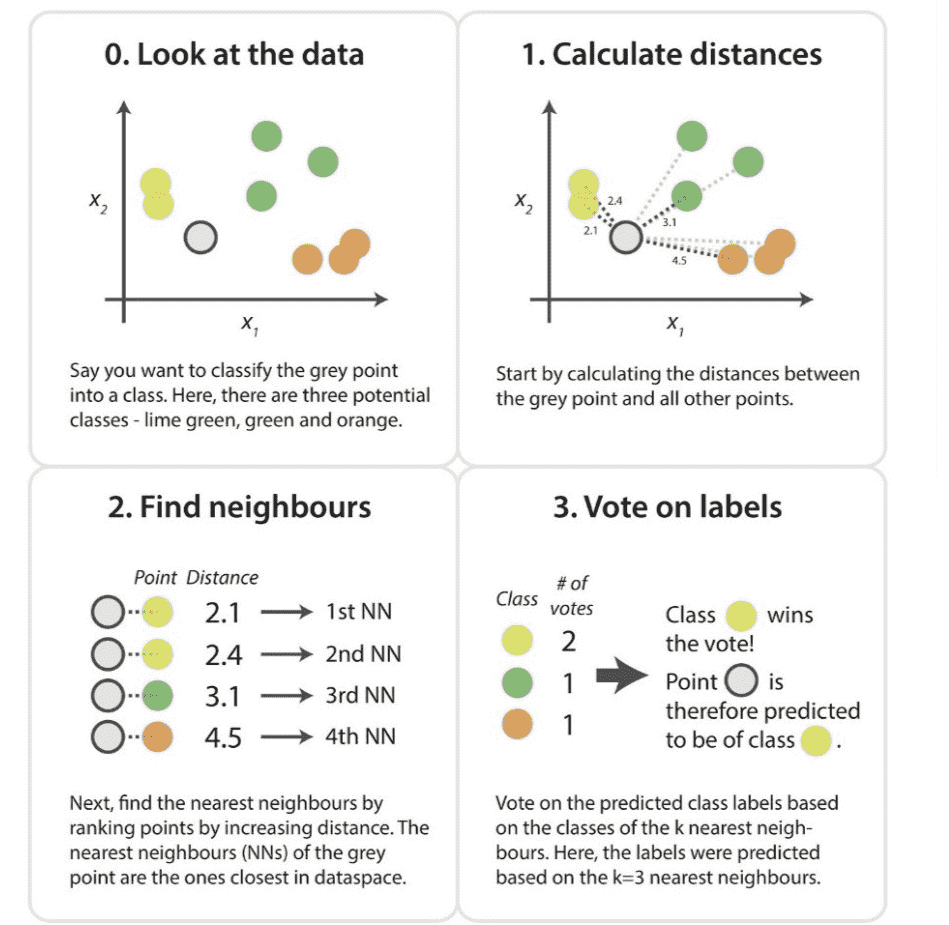

source of image: [Link](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4)

In [16]:
# Use of KNN for multiclass classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [17]:
#train the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
# make prediction
pred_knn = knn.predict(X_test)

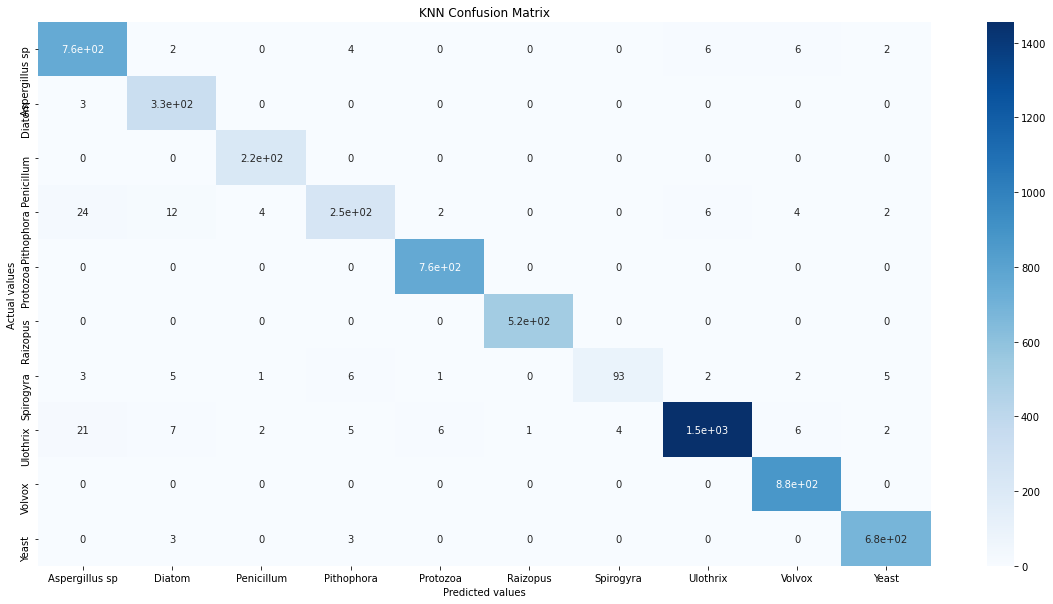

In [19]:
# plot confusion matrix to see the result
cf_matrix_dt = confusion_matrix(y_test, pred_knn)

plt.figure(figsize=(20,10))
ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues')
ax.set_title('KNN Confusion Matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

ax.xaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])
ax.yaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])
plt.show()

In [20]:
# check model accuracy score
print(classification_report((y_test), pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       775
           1       0.92      0.99      0.95       333
           2       0.97      1.00      0.98       221
           3       0.93      0.82      0.87       301
           4       0.99      1.00      0.99       757
           5       1.00      1.00      1.00       525
           6       0.96      0.79      0.87       118
           7       0.99      0.96      0.98      1509
           8       0.98      1.00      0.99       877
           9       0.98      0.99      0.99       690

    accuracy                           0.97      6106
   macro avg       0.97      0.95      0.96      6106
weighted avg       0.97      0.97      0.97      6106



In [21]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {pred_knn[:20]}")

Actual: 
 [1 5 3 4 9 9 2 3 3 4 1 8 9 8 0 7 7 8 7 8]
Predictions: 
 [1 5 8 4 9 9 2 3 1 4 1 8 9 8 0 7 7 8 7 8]


The overall score for KNN obtained is 97% with k-value = 2. However, we can determine the optimal value of k by visualizing the k-value VS mean error of the KNN model.

In [22]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

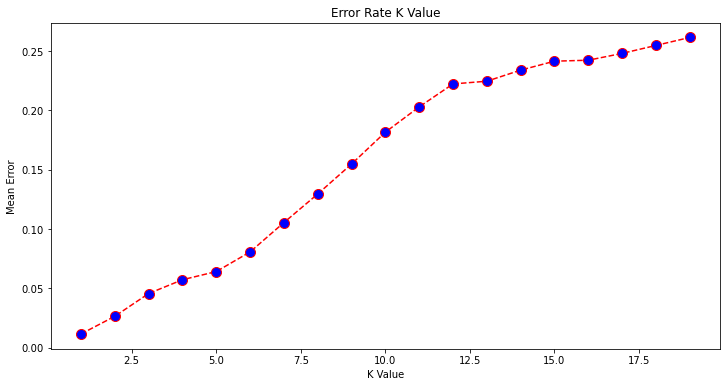

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the Error Rate K Value graph above, we can see that the error increases as the k-value increases. It is wise to set lower k-value so that the error is small for KNN algorithm.

### 3. Use of Decision Tree to determine the type of Microorganism

Decision Tree is a supervised machine learning algorithm that can be used in both classification and regression problems. The model is build in such a way of a tree structure with decision nodes and leaf nodes. A decision node consists of two or more branches. Leaf node represents the target values or decision. A topmost decision node is the root node.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=12345)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=12345)

In [26]:
pred_dt = dt.predict(X_test)

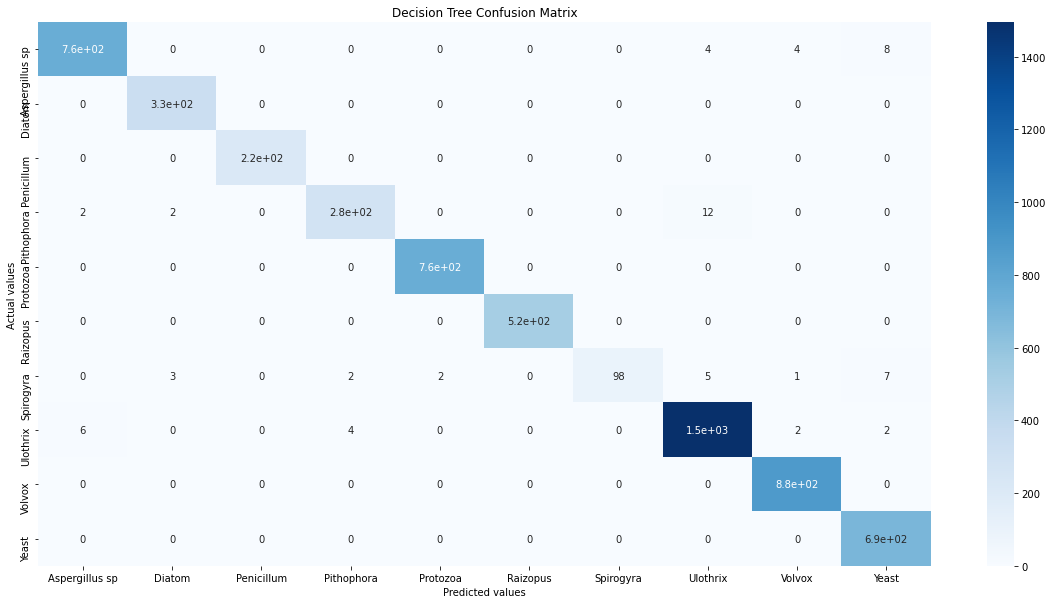

In [27]:
cf_matrix_dt = confusion_matrix(y_test, pred_dt)

plt.figure(figsize=(20,10))
ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

ax.xaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])
ax.yaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])

plt.show()

In [28]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       775
           1       0.99      1.00      0.99       333
           2       1.00      1.00      1.00       221
           3       0.98      0.95      0.96       301
           4       1.00      1.00      1.00       757
           5       1.00      1.00      1.00       525
           6       1.00      0.83      0.91       118
           7       0.99      0.99      0.99      1509
           8       0.99      1.00      1.00       877
           9       0.98      1.00      0.99       690

    accuracy                           0.99      6106
   macro avg       0.99      0.97      0.98      6106
weighted avg       0.99      0.99      0.99      6106



In [29]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {pred_dt[:20]}")

Actual: 
 [1 5 3 4 9 9 2 3 3 4 1 8 9 8 0 7 7 8 7 8]
Predictions: 
 [1 5 7 4 9 9 2 3 3 4 1 8 9 8 0 7 7 8 7 8]


### 3. Use of Random Forest to determine the type of Microorganisms

Random Forest is also type of supervised machine learning algorithm that also can be used in both classification and regression problems. Random forest is an esemble that constructs many decision trees during the training. It predicts the mode of the classes for classification tasks and mean prediction of trees for regression tasks.

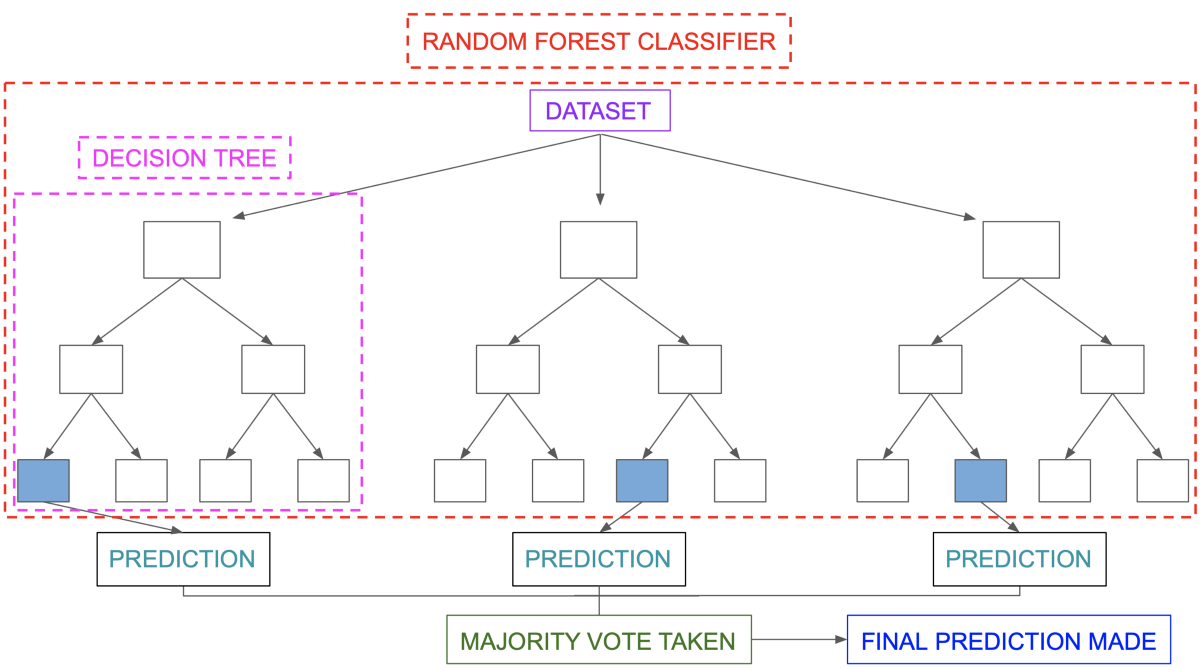

Image taken from [Link](https://www.congrelate.com/33-random-forests-machine-learning-pictures/)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [31]:
rf.fit(X_test, y_test)

RandomForestClassifier()

In [32]:
pred_rf = rf.predict(X_test)

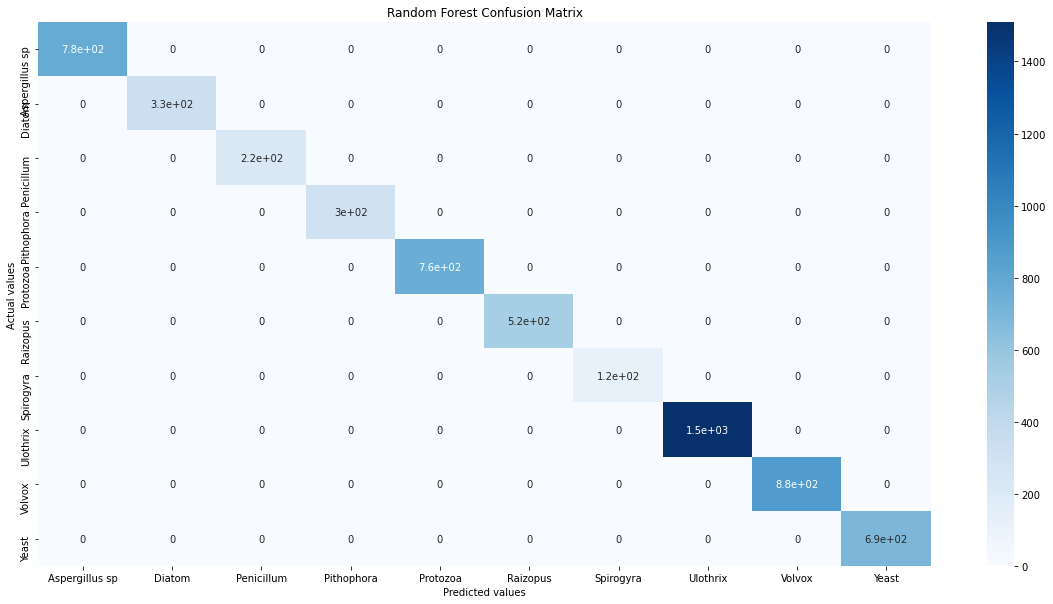

In [33]:
cf_matrix_rf = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(20,10))
ax = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

ax.xaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])
ax.yaxis.set_ticklabels(['Aspergillus sp', 'Diatom', 'Penicillum', 'Pithophora', 'Protozoa', 'Raizopus', 'Spirogyra', 'Ulothrix', 'Volvox', 'Yeast'])

plt.show()

In [34]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       775
           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       301
           4       1.00      1.00      1.00       757
           5       1.00      1.00      1.00       525
           6       1.00      1.00      1.00       118
           7       1.00      1.00      1.00      1509
           8       1.00      1.00      1.00       877
           9       1.00      1.00      1.00       690

    accuracy                           1.00      6106
   macro avg       1.00      1.00      1.00      6106
weighted avg       1.00      1.00      1.00      6106



In [35]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {pred_rf[:20]}")

Actual: 
 [1 5 3 4 9 9 2 3 3 4 1 8 9 8 0 7 7 8 7 8]
Predictions: 
 [1 5 3 4 9 9 2 3 3 4 1 8 9 8 0 7 7 8 7 8]


### 4. Conclusion

There are many machine learning algorithm that can be used for predictions. In this project, three types of ML algorithm used gave different accuracy result. The highest accuracy can be seen from **Random Forest** algorithm, then **Decision Tree** algorithm and least accurate is from the **KNN** algorithm with 100%, 99% and 97% accuracy respectively.